In [269]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [270]:
df = sns.load_dataset('iris')

In [271]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
109,7.2,3.6,6.1,2.5,virginica
47,4.6,3.2,1.4,0.2,setosa
144,6.7,3.3,5.7,2.5,virginica
111,6.4,2.7,5.3,1.9,virginica


In [272]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [273]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,0
123,6.3,2.7,4.9,1.8,2
73,6.1,2.8,4.7,1.2,1
82,5.8,2.7,3.9,1.2,1
113,5.7,2.5,5.0,2.0,2
105,7.6,3.0,6.6,2.1,2
51,6.4,3.2,4.5,1.5,1
61,5.9,3.0,4.2,1.5,1
62,6.0,2.2,4.0,1.0,1
149,5.9,3.0,5.1,1.8,2


In [274]:
df = df[['sepal_length','petal_length','species']]

In [275]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [276]:
X

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [277]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [279]:
clf = LogisticRegression(multi_class='multinomial')

In [280]:
clf.fit(X_train, y_train)

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [281]:
y_pred = clf.predict(X_test)

In [282]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [283]:
pd.DataFrame(confusion_matrix(y_test, y_pred)) 

,0,1,2
0,9,0,0
1,0,10,1
2,0,0,10


In [284]:
query = np.array([[5.0, 3.5]])
clf.predict_proba(query)

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.16280642, 0.82502641, 0.01216717]])

In [285]:
clf.predict(query)

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Nikhil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


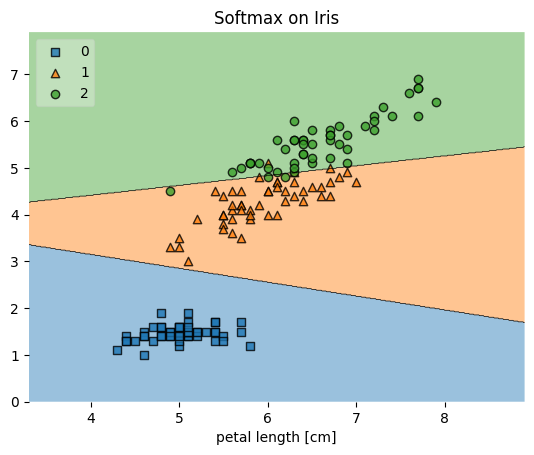

In [286]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()